In [1]:
from transformers import AutoModel, AutoTokenizer

In [3]:
# tokenizer = AutoTokenizer.from_pretrained("bert-base-japanese-whole-word-masking")
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-whole-word-masking")

In [4]:
model = AutoModel.from_pretrained("/Users/kubota/Sandbox/JPHACKS_2020/DistilBERT-base-jp")

In [5]:
import torch
def get_embedding(model, tokenizer, text):
  tokenized_text = tokenizer.tokenize(text)
  tokenized_text.insert(0, '[CLS]')
  tokenized_text.append('[SEP]')
  tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
  tokens_tensor = torch.tensor([tokens])
  model.eval()
  with torch.no_grad():
      layers, _ = model(tokens_tensor)
  target_layer = -2
  embedding = layers[0][target_layer].numpy()
  return embedding

In [6]:
import numpy as np
embedding_list = []
f = open('./input.txt')
sentens = f.readlines()
f.close()

In [7]:
for s in sentens:
  mbedding = get_embedding(model, tokenizer, s.strip())
  embedding_list.append(mbedding)

In [9]:
len(mbedding)

768

In [12]:
len(embedding_list)

8

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2)

In [20]:
res = pca.fit_transform(X = embedding_list)

In [21]:
res

array([[-0.25370023,  0.23860802],
       [-0.19150423,  0.08474937],
       [-0.27681419,  0.18703732],
       [-0.15340472, -0.09621814],
       [-0.07869163, -0.18188444],
       [ 0.12911509, -0.2121823 ],
       [ 0.81688903,  0.15705827],
       [ 0.00811088, -0.1771681 ]])

In [26]:
import matplotlib.pyplot as plt
import japanize_matplotlib

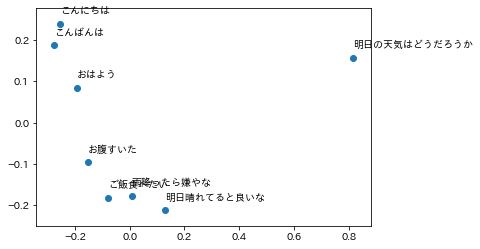

In [27]:
plt.scatter(res[:,0], res[:, 1])
for i in range(len(res)):
    plt.text(x = res[i,0], y = res[i, 1], s = sentens[i])

In [37]:
embedding_list = []
f = open('./colorlist.txt')
sentens = f.readlines()
f.close()
for s in sentens:
  mbedding = get_embedding(model, tokenizer, s.strip())
  embedding_list.append(mbedding)

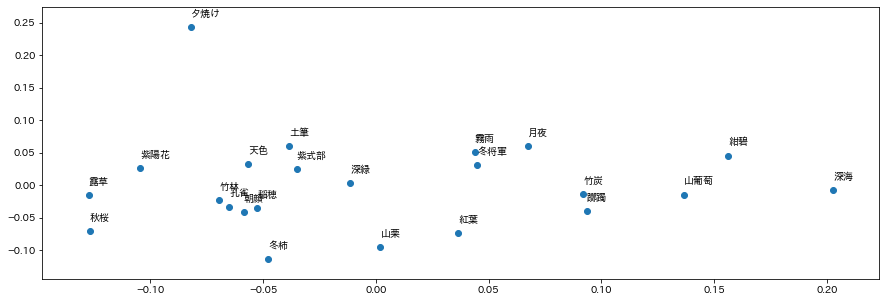

In [42]:
pca = PCA(n_components = 2)
res = pca.fit_transform(X = embedding_list)
plt.figure(figsize = (15,5))
plt.scatter(res[:,0], res[:, 1])
for i in range(len(res)):
    plt.text(x = res[i,0], y = res[i, 1], s = sentens[i])
    
plt.savefig("color_pca.png")

In [75]:
f = open('./colorlist.txt')
sentens = f.readlines()
f.close()

test_text = "光"
sentens.append(test_text)

embedding_list = []
for s in sentens:
  mbedding = get_embedding(model, tokenizer, s.strip())
  embedding_list.append(mbedding)

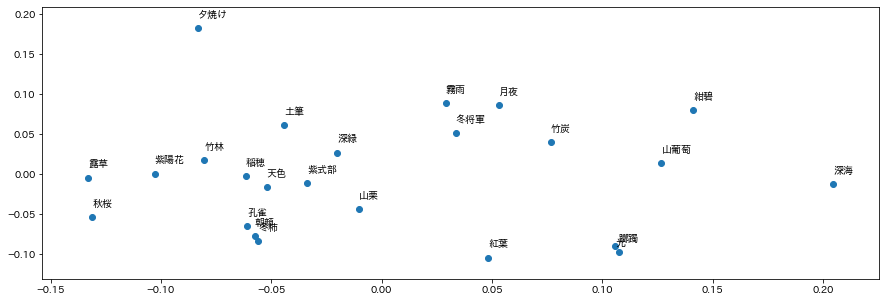

In [76]:
pca = PCA(n_components = 2)
res = pca.fit_transform(X = embedding_list)
plt.figure(figsize = (15,5))
plt.scatter(res[:,0], res[:, 1])
for i in range(len(sentens)):
    plt.text(x = res[i,0], y = res[i, 1], s = sentens[i])

In [85]:
f = open('./colorlist.txt')
sentens = f.readlines()
f.close()

color_embedding_list = []
for s in sentens:
  mbedding = get_embedding(model, tokenizer, s.strip())
  color_embedding_list.append(mbedding)

In [99]:
test_text = """まっかだな　まっかだな
つたの　葉っぱが　まっかだな
もみじの　葉っぱも　まっかだな
沈む　夕日に　てらされて
まっかなほっぺたの　君と僕
まっかな　秋に　かこまれて　いる

まっかだな　まっかだな
からすうりって　まっかだな
とんぼのせなかも　まっかだな
夕焼雲(ゆうやけぐも)を　ゆびさして
まっかなほっぺたの　君と僕
まっかな　秋に　よびかけて　いる

まっかだな　まっかだな
ひがん花って　まっかだな
遠くの　たき火も　まっかだな
お宮の　鳥居(とりい)を　くぐりぬけ
まっかなほっぺたの　君と僕
まっかな　秋を　たずねて　まわる"""

In [100]:
res = get_embedding(model, tokenizer, test_text.strip())

In [101]:
embedding_list = color_embedding_list[:]

In [102]:
embedding_list.append(res)

In [103]:
len(embedding_list)

24

In [104]:
len(color_embedding_list)

23

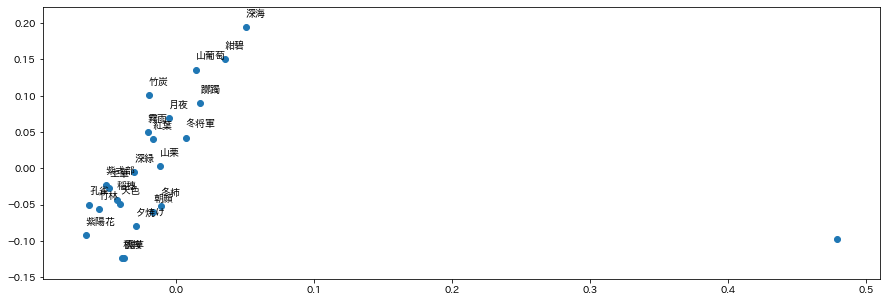

In [105]:
pca = PCA(n_components = 2)
pca_res = pca.fit_transform(X = embedding_list)
plt.figure(figsize = (15,5))
plt.scatter(pca_res[:,0], pca_res[:, 1])
for i in range(len(sentens)):
    plt.text(x = pca_res[i,0], y = pca_res[i, 1], s = sentens[i])

In [96]:
len(v)

768

In [110]:
prod = []
for v in color_embedding_list:
        prod.append(np.linalg.norm(v-res, ord = 2))

In [111]:
prod

[0.5653032,
 0.57401186,
 0.55397314,
 0.54370284,
 0.57612836,
 0.5600077,
 0.5909074,
 0.5458143,
 0.55506337,
 0.5678278,
 0.542588,
 0.55388606,
 0.55910474,
 0.55136615,
 0.5583315,
 0.55745625,
 0.5718638,
 0.5391745,
 0.5917619,
 0.5704046,
 0.56164473,
 0.57466304,
 0.5518592]

In [117]:
sentens[np.array(prod).argmin()]

'山葡萄\n'

In [118]:
def choose_color(s):
    res = get_embedding(model, tokenizer, s.strip())
    prod = []
    for v in color_embedding_list:
            prod.append(np.linalg.norm(v-res, ord = 2))
    return sentens[np.array(prod).argmin()].strip()

In [119]:
choose_color("みかん")

'竹林'

In [120]:
choose_color("カツオ")

'稲穂'

In [121]:
choose_color("焼肉")

'竹炭'

In [127]:
s = """
ともだちができた　すいかの名産地
なかよしこよし　すいかの名産地
すいかの名産地　すてきなところよ
きれいなあの娘の晴れ姿　すいかの名産地

五月のある日　すいかの名産地
結婚式をあげよう　すいかの名産地
すいかの名産地　すてきなところよ
きれいなあの娘の晴れ姿　すいかの名産地

とんもろこしの花婿　すいかの名産地
小麦の花嫁　すいかの名産地
すいかの名産地　すてきなところよ
きれいなあの娘の晴れ姿　すいかの名産地
"""
choose_color(s)

'夕焼け'